In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import markers
import seaborn as sns
import textwrap
import math

In [11]:
# import data straight from .xlsx file
# this is using a temporary test data source for now
df = pd.read_excel(r'/home/iain/programming/python/yield_data.xlsx',)
print(df)

          date                   crop  lotNumber       yield  towerDays   
0   2022-12-21  Micro Purslane Golden        NaN  136.800000       22.0  \
1   2022-12-21   Micro Purslane Green        NaN  136.800000       22.0   
2   2023-01-04   Micro Purslane Green        NaN  115.000000       12.0   
3   2023-01-06   Micro Purslane Green        NaN  129.000000       14.0   
4   2023-01-09   Micro Purslane Green        NaN  181.000000       17.0   
..         ...                    ...        ...         ...        ...   
111 2023-05-01                 Viola    300049.0    6.902857       89.0   
112 2023-05-02                Oregano   300136.0  189.000000       39.0   
113 2023-05-02    Chili Pepper Padron        NaN  353.333333      125.0   
114 2023-05-02             Buzzflower        NaN   45.000000        NaN   
115 2023-05-02          Borage flower        NaN   22.000000        NaN   

          recipe notes  
0    Herbs_002_a   NaN  
1    Herbs_002_a   NaN  
2    Herbs_002_a   NaN  

In [4]:
# for loop to generate number of harvests, means/medians and std. deviations for the cropList variable
# sort index by date

dates = ['2023-1-1', '2023-5-7']
df = df.sort_index()
df_date = df.loc[df['date'].between(dates[0],dates[1])]

cropList = ["Micro Amaranth Red Aztec",
            "Micro Basil Salvo",
            "Micro Coriander Splits",
            "Micro Rocket Victoria"]

# initiate lists
noList = []
meanList = []
stdList = []
maxCrop = []
minDay = []
maxDay = []
for crop in cropList:
    # go through each crop in cropList
    for item in df_date.loc[df_date['crop'] == crop]:
        # create a temp dataframe for each crop
        df_temp = df_date.loc[df_date['crop'] == crop]
        cropNo = df_temp.shape[0]
        cropMean = df_temp["yield"].mean()
        cropStd = df_temp["yield"].std()
        tempcropMax = df_temp["yield"].max()
        tempdayMin = df_temp["towerDays"].min()
        tempdayMax = df_temp["towerDays"].max()
    # append values from temporary variables to lists
    noList.append(cropNo)
    meanList.append(cropMean)
    stdList.append(cropStd)
    maxCrop.append(tempcropMax)
    minDay.append(tempdayMin)
    maxDay.append(tempdayMax)

# convert lists into a dataframe
listlists = noList, meanList, stdList
df_cropData = pd.DataFrame(listlists)
# set column titles as croplist
df_cropData.columns = cropList
# set row titles
rows = "No. harvests", "Mean yield (g)", "Std. deviation"
df_cropData.index = rows
# reduce number of decimal places to 2
df_cropData = df_cropData.round(2)


df_cropData.head()
#print(df_cropData)

,Micro Amaranth Red Aztec,Micro Basil Salvo,Micro Coriander Splits,Micro Rocket Victoria
No. harvests,13.00,8.00,13.00,11.00
Mean yield (g),69.10,120.01,59.45,78.90
Std. deviation,30.55,18.52,21.25,22.32


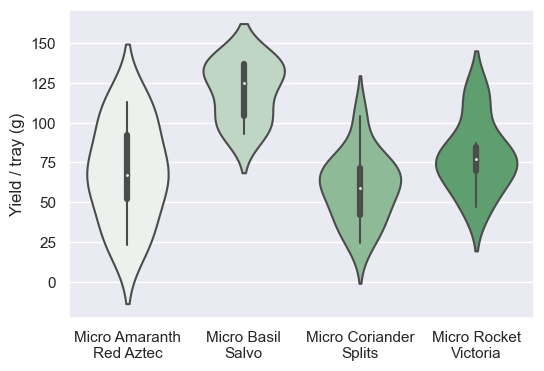

In [132]:
### violin plots for the four main crops
# takes date range from above
df_date = df.loc[df['date'].between(dates[0],dates[1])]
# select only crops in the list above
df_datecrop = df_date.loc[df_date['crop'].isin(cropList)]

# set violinplot colour fill
colourList = ['#ab096c','#11e070','#7ed93f','#09ab2a']

# for wrapping the x tick labels
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

sns.set(style="whitegrid")
sns.set_theme()

plt.figure(figsize=(6,4))
ax = sns.violinplot(x="crop", y="yield", data = df_datecrop,
                    palette="light:g", scale="width", width=.7, linewidth=1.5, inner="box")
# set blank x label, y label
ax.set_xlabel("")
ax.set_ylabel("Yield / tray (g)")
# wrap x label texts
wrap_labels(ax, 15)
# figure dimensions
#rcParams['figure.figsize'] = 14,10

plt.show(ax)

fig = ax.get_figure()
dateForFile = [date[: -2] for date in dates]
                      
fig.savefig("yieldfigure.png")

# make the colour settings more appealing

In [17]:
### scatter plots for each crop individual
# takes date range from above
df_date = df.loc[df['date'].between(dates[0],dates[1])]

cropList = ["Micro Amaranth Red Aztec",
            "Micro Basil Salvo",
            "Micro Coriander Splits",
            "Micro Rocket Victoria",
            "Pea Shoots 4019",
            "Pea Shoots Style"]
#last entry has wrong labels
dfList = [df_date.loc[df_date['crop'] == cropList[0]],
          df_date.loc[df_date['crop'] == cropList[1]],
          df_date.loc[df_date['crop'] == cropList[2]],
          df_date.loc[df_date['crop'] == cropList[3]],
          df_date.loc[(df_date['crop'] == cropList[4]) | (df_date['crop'] == cropList[5])]]

#set the X axis min and max limit for all figures
dVar = math.ceil(min(minDay))/2
minX = (math.ceil(dVar)-1)*2
dVar = math.ceil(max(maxDay))/2
maxX = (math.ceil(dVar)+1)*2

#set the Y axis max limit for all figures
dVar = math.ceil(max(maxCrop))/20
maxY = (math.ceil(dVar)+1)*20

sns.set(style='darkgrid')
plt.figure(figsize=(9,6))

g0=sns.lmplot(x='towerDays',
              y='yield', 
              hue='crop',
              legend=False,
              markers="+",
              ci=None,
              data=dfList[0]).set(xlim=(minX,maxX),
       ylim=(0, maxY),
       xlabel="Days under light",
       ylabel="Yield / tray (g)")
g0= g0.figure
g0.savefig(cropList[0]+'.png', dpi=300)
plt.clf()

g1=sns.lmplot(x='towerDays',
              y='yield', 
              hue='crop',
              legend=False,
              markers="+",
              ci=None,
              data=dfList[1]).set(xlim=(minX,maxX),
       ylim=(0, maxY),
       xlabel="Days under light",
       ylabel="Yield / tray (g)")
g1= g1.figure
g1.savefig(cropList[1]+'.png', dpi=300)
plt.clf()

g2=sns.lmplot(x='towerDays',
              y='yield', 
              hue='crop',
              legend=False,
              markers="+",
              ci=None,
              data=dfList[2]).set(xlim=(minX,maxX),
       ylim=(0, maxY),
       xlabel="Days under light",
       ylabel="Yield / tray (g)")
g2= g2.figure
g2.savefig(cropList[2]+'.png', dpi=300)
plt.clf()

g3=sns.lmplot(x='towerDays',
              y='yield', 
              hue='crop',
              legend=False,
              markers="+",
              ci=None,
              data=dfList[3]).set(xlim=(minX,maxX),
       ylim=(0, maxY),
       xlabel="Days under light",
       ylabel="Yield / tray (g)")
g3= g3.figure
g3.savefig(cropList[3]+'.png', dpi=300)
plt.clf()

# pea shoots and tendrils in a single grid



Empty DataFrame
Columns: [date, crop, lotNumber, yield, towerDays, recipe, notes]
Index: []


<Figure size 648x432 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [ ]:
# figures for long term crops
# violas, nasturtiums, mint etc.

In [123]:
### scatter plots for each crop combined
# takes date range from above
df_date = df.loc[df['date'].between(dates[0],dates[1])]
# select only crops in the list above
df_datecrop = df_date.loc[df_date['crop'].isin(cropList)]

#set the X axis min and max limit for all figures
dVar = math.ceil(min(minDay))/2
minX = (math.ceil(dVar)-1)*2
dVar = math.ceil(max(maxDay))/2
maxX = (math.ceil(dVar)+1)*2

#set the Y axis max limit for all figures
dVar = math.ceil(max(maxCrop))/20
maxY = (math.ceil(dVar)+1)*20

sns.set(style='darkgrid')
plt.figure(figsize=(9,6))

gCombined=sns.lmplot(x='towerDays',
                     y='yield',
                     hue='crop',
                     legend=True,
                     markers="x",
                     ci=None,
                     data=df_datecrop)
gCombined.set(xlim=(minX,maxX),
              ylim=(0, maxY),
              xlabel="Days under light",
              ylabel="Yield / tray (g)")
gCombined = gCombined.figure
gCombined.savefig("combined.png", dpi=300)
plt.clf()
 
#g0=sns.lmplot(x='towerDays',
#              y='yield', 
#              hue='crop',
#              legend=False,
#              markers="+",
#              ci=None,
#              data=dfList[0])
#g0.set(xlim=(minX,maxX),
#       ylim=(0, maxY),
#       xlabel="Days under light",
#       ylabel="Yield / tray (g)")
#g0= g0.figure
#g0.savefig(cropList[0]+'.png', dpi=300)
#plt.clf()

<Figure size 648x432 with 0 Axes>

<Figure size 546.35x360 with 0 Axes>

In [ ]:
# scatter plots for each crop in a for list


# takes date range from above
df_date = df.loc[df['date'].between(dates[0],dates[1])]
# select only crops in the list above
df_datecrop = df_date.loc[df_date['crop'].isin(cropList)]

